In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [3]:
data=pd.read_csv("C:\\Users\\perum\\Downloads\\1.03.+Dummies.csv")

In [4]:
data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [5]:
 d=data.copy()

In [6]:
d['Attendance']=d['Attendance'].map({'Yes':1,'No':0})

In [7]:
d


,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [10]:
y=d['GPA']
x1=d[['SAT','Attendance']]

In [11]:
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Sat, 08 Mar 2025   Prob (F-statistic):           2.19e-15
Time:                        22:54:37   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

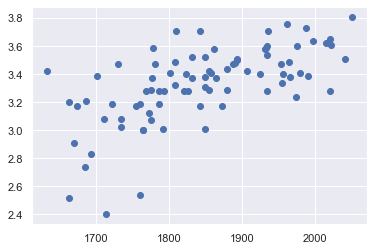

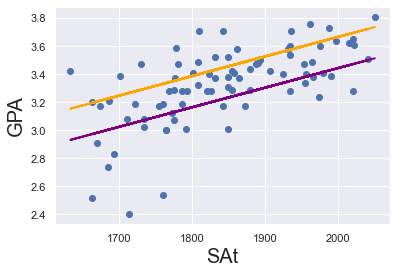

In [20]:
plt.scatter(d['SAT'],y)
y_1=0.6439+0.0014*d['SAT']
y_2=0.8665+0.0014*d['SAT']
fig=plt.plot(d['SAT'],y_1,lw=2,c="purple")
fig=plt.plot(d['SAT'],y_2,lw=2,c="orange")
plt.xlabel('SAt',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.show()

In [21]:
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


In [22]:
new_data=pd.DataFrame({'const':1,'SAT':[1700,1670],'Attendance':[0,1]})

In [23]:
new_data=new_data[['const','SAT','Attendance']]

In [24]:
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [27]:
new_data.rename(index={0:'Bob',1:'Alice'})

,const,SAT,Attendance
Bob,1,1700,0
Alice,1,1670,1


In [28]:
pred=results.predict(new_data)

In [29]:
pred

0    3.023513
1    3.204163
dtype: float64